In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid") # seabornの背景色を白に変更

## レストランのレビューデータによる検証
レストランのレビューデータを用いて対数変換の効果の検証を行う. レビュー件数を用いて店舗の平均評価を予測するタスクを考える. 効果の検証のためにオリジナルのレビュー件数と,対数変換を行ったレビュー件数について線形回帰モデルを作成する. 評価は10分割クロスバリデーションで行い,性能指標は決定係数$R^2$とする.

In [4]:
# load data
import json
with open ("./Data/yelp_academic_dataset_business.json",encoding="utf-8_sig") as biz_file:
    biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])

# 対数変換
biz_df["log_review_count"] = np.log10(biz_df["review_count"]+1)
biz_df = biz_df[["stars","review_count","log_review_count"]]
biz_df.head()

,stars,review_count,log_review_count
0,4.0,86,1.939519
1,4.0,126,2.103804
2,4.5,13,1.146128
3,3.0,8,0.954243
4,4.0,14,1.176091


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# オリジナルのレビュー件数を用いたモデル
model = LinearRegression()
scores = cross_val_score(model, biz_df[["review_count"]], biz_df["stars"], cv=10)

# 対数変換したレビュー件数を用いたモデル
model_log = LinearRegression()
scores_log = cross_val_score(model_log, biz_df[["log_review_count"]], biz_df["stars"], cv=10)
print("R-squared score without log transform : %0.5f (+/-) %0.5f" %(scores.mean(),scores.std()*2))
print("R-squared score with log transform : %0.5f (+/-) %0.5f" %(scores_log.mean(),scores_log.std()*2))

R-squared score without log transform : 0.00113 (+/-) 0.00050
R-squared score with log transform : 0.00001 (+/-) 0.00016


実行結果からどちらのモデルも決定係数が低いことがわかる. また対数変換を行ったモデルのほうが決定係数が低いこともわかる. これより対数変換の有無に関わらずレビュー件数を用いて店舗の平均評価を予測する良い特徴量ではないことがわかる. これは次のセルに示すように, レビュー件数と評価に相関はあるが,全体としては線形でないことが原因として考えられる.

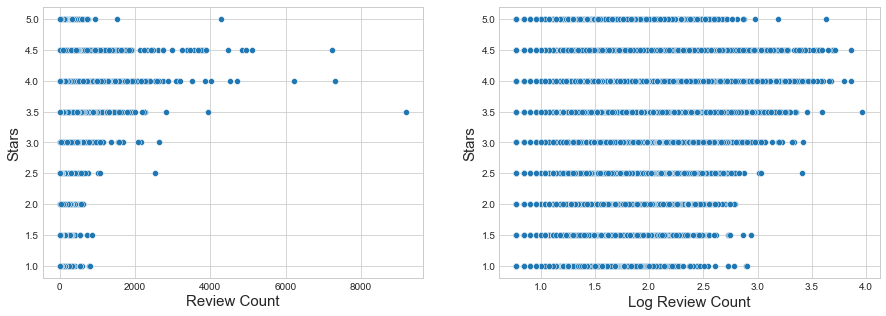

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
g = sns.scatterplot(data=biz_df,x="review_count",y="stars")
g.set_xlabel("Review Count",fontsize=15)
g.set_ylabel("Stars",fontsize=15)
plt.subplot(1,2,2)
g = sns.scatterplot(data=biz_df,x="log_review_count",y="stars")
g.set_xlabel("Log Review Count",fontsize=15)
g.set_ylabel("Stars",fontsize=15)
plt.show()

## ニュース記事のデータによる検証
ニュース記事のデータを用いて対数変換の効果の検証を行う. 記事の単語数を用いて記事のニュースのシェア数を予測するタスクを考える. 効果検証のためにオリジナルの単語数と, 対数変換を行った単語数について線形回帰モデルを作成する. 評価は10分割バリデーションで行い,性能指標は決定係数$R^2$とする.

In [13]:
# load data
df = pd.read_csv("./Data/OnlineNewsPopularity.csv",delimiter=", ")

# 対数変換
df["log_n_tokens_content"] = np.log10(df["n_tokens_content"]+1)
df = df[["n_tokens_content","log_n_tokens_content","shares"]]
df.head()

<ipython-input-13-508c3bbffe99>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("./Data/OnlineNewsPopularity.csv",delimiter=", ")


,n_tokens_content,log_n_tokens_content,shares
0,219.0,2.342423,593
1,255.0,2.408240,711
2,211.0,2.326336,1500
3,531.0,2.725912,1200
4,1072.0,3.030600,505


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# オリジナルのレビュー件数を用いたモデル
model = LinearRegression()
scores = cross_val_score(model, df[["n_tokens_content"]], df["shares"], cv=10)

# 対数変換したレビュー件数を用いたモデル
model_log = LinearRegression()
scores_log = cross_val_score(model_log, df[["log_n_tokens_content"]], df["shares"], cv=10)
print("R-squared score without log transform : %0.5f (+/-) %0.5f" %(scores.mean(),scores.std()*2))
print("R-squared score with log transform : %0.5f (+/-) %0.5f" %(scores_log.mean(),scores_log.std()*2))

R-squared score without log transform : -0.00242 (+/-) 0.00509
R-squared score with log transform : -0.00114 (+/-) 0.00418


信頼区間に重なりがあるため有意とは言えないが,変数変換を行った特徴量のほうが決定係数が高いといえる. この例で対数変換を行ったほうが決定係数がよかったのは, 次のセルに示すように対数変換を行わないとシェア数20万件以上の外れ値の影響を受けるためであると考えられる.

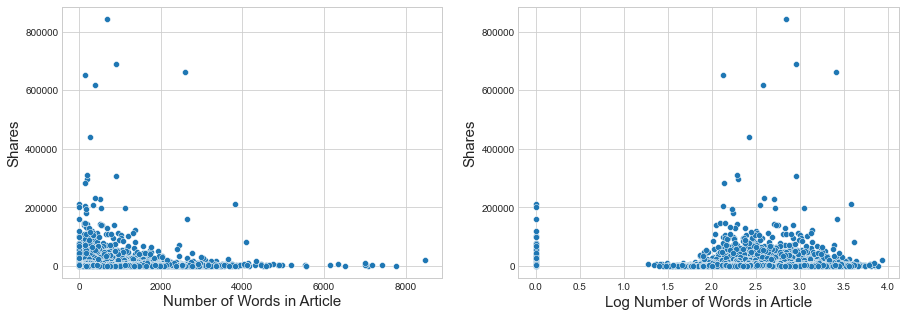

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
g = sns.scatterplot(data=df,x="n_tokens_content",y="shares")
g.set_xlabel("Number of Words in Article",fontsize=15)
g.set_ylabel("Shares",fontsize=15)
plt.subplot(1,2,2)
g = sns.scatterplot(data=df,x="log_n_tokens_content",y="shares")
g.set_xlabel("Log Number of Words in Article",fontsize=15)
g.set_ylabel("Shares",fontsize=15)
plt.show()